# Пример вызова функции

In [1]:
from AnomalyDetector import AnomalyDetector

In [2]:
detector = AnomalyDetector()

In [ ]:
mask, land_water_mask = detector.get_anom_mask(matrix_data, small_lat, small_lon)

# Визуализация

In [2]:
seas=['Карское',
          'Лаптевых',
          'Гренландское',
          'Баренцево',
          'Чукотское',
          'Бофорта',
          'Восточно-Сибирское']

In [3]:
sea_index_dict = {
    'Карское': [6, 9, 10, 17],
    'Лаптевых': [16],
    'Гренландское': [10, 12],
    'Баренцево': [0, 6, 7],
    'Чукотское': [1],
    'Бофорта': [153],
    'Восточно-Сибирское': [158]
}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_with_mask(ax, data, mask, title, data_cmap='Blues_r', mask_color='green', vmin=None, vmax=None, cbar_shrink=0.8):
    
    data_img = ax.imshow(data, cmap=data_cmap, origin='lower', vmin=vmin, vmax=vmax)
    
    mask_overlay = np.zeros_like(mask, dtype=float)
    mask_overlay[mask == 0] = 1
    
    cmap = mcolors.ListedColormap([mask_color, 'none']) 
    bounds = [0, 1, 2]  
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    ax.imshow(mask_overlay, cmap=cmap, norm=norm, origin='lower', alpha=0.5, interpolation='none')
    
    cbar = plt.colorbar(data_img, ax=ax, label='Data Value', shrink=cbar_shrink)
    ax.set_title(title)
    ax.grid(False)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

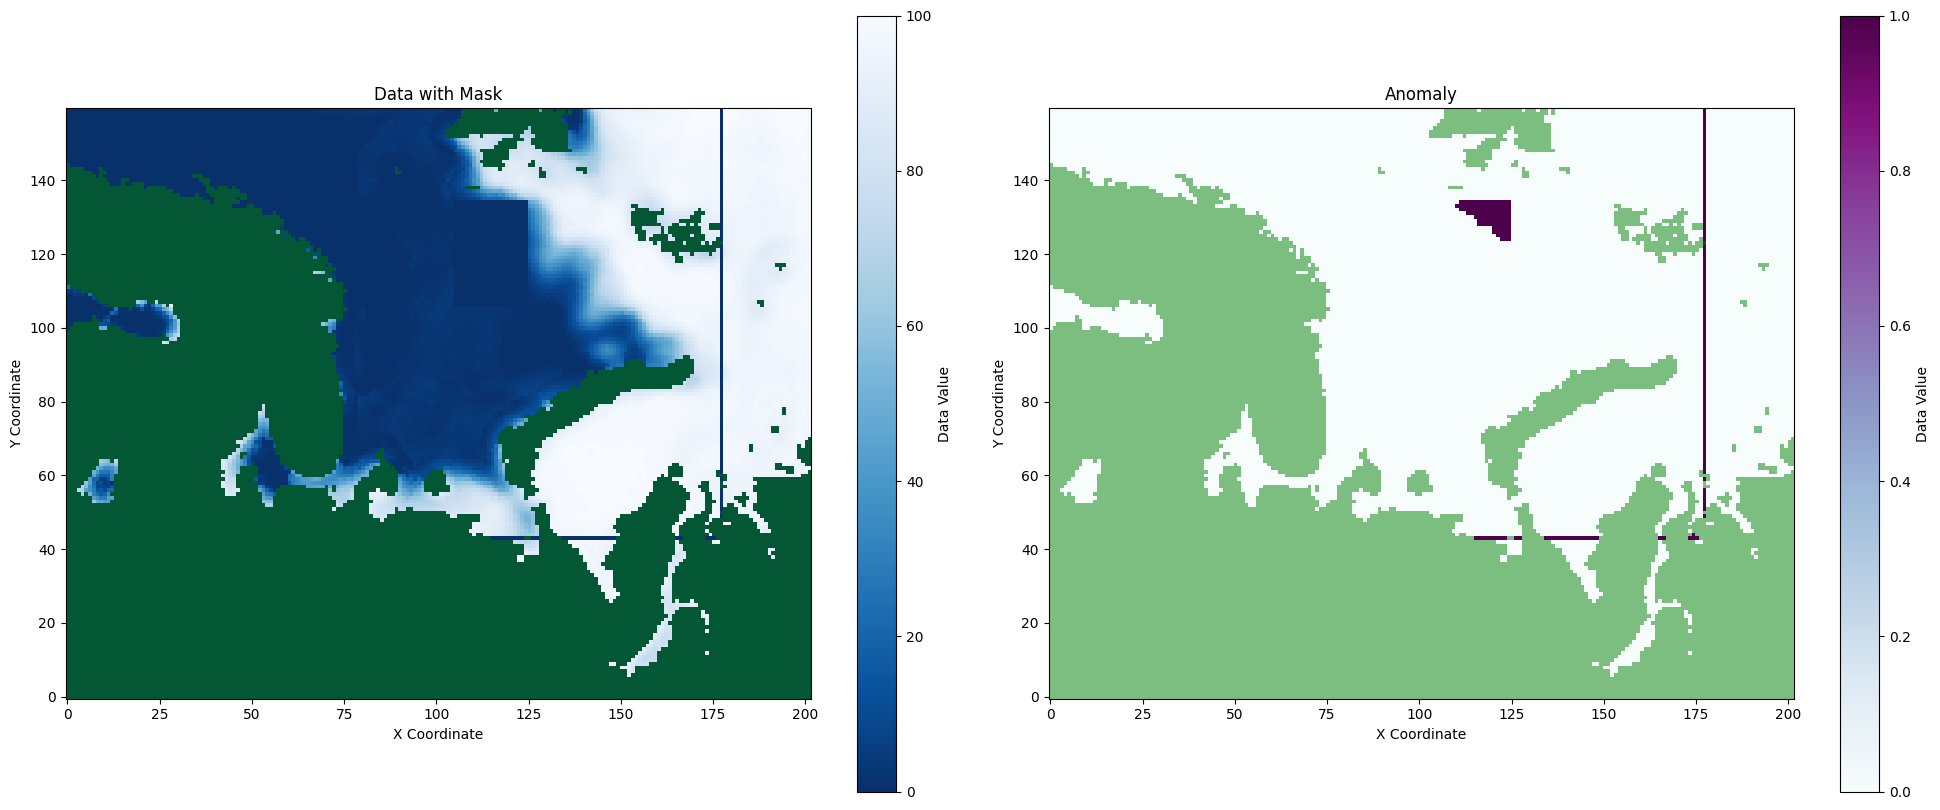

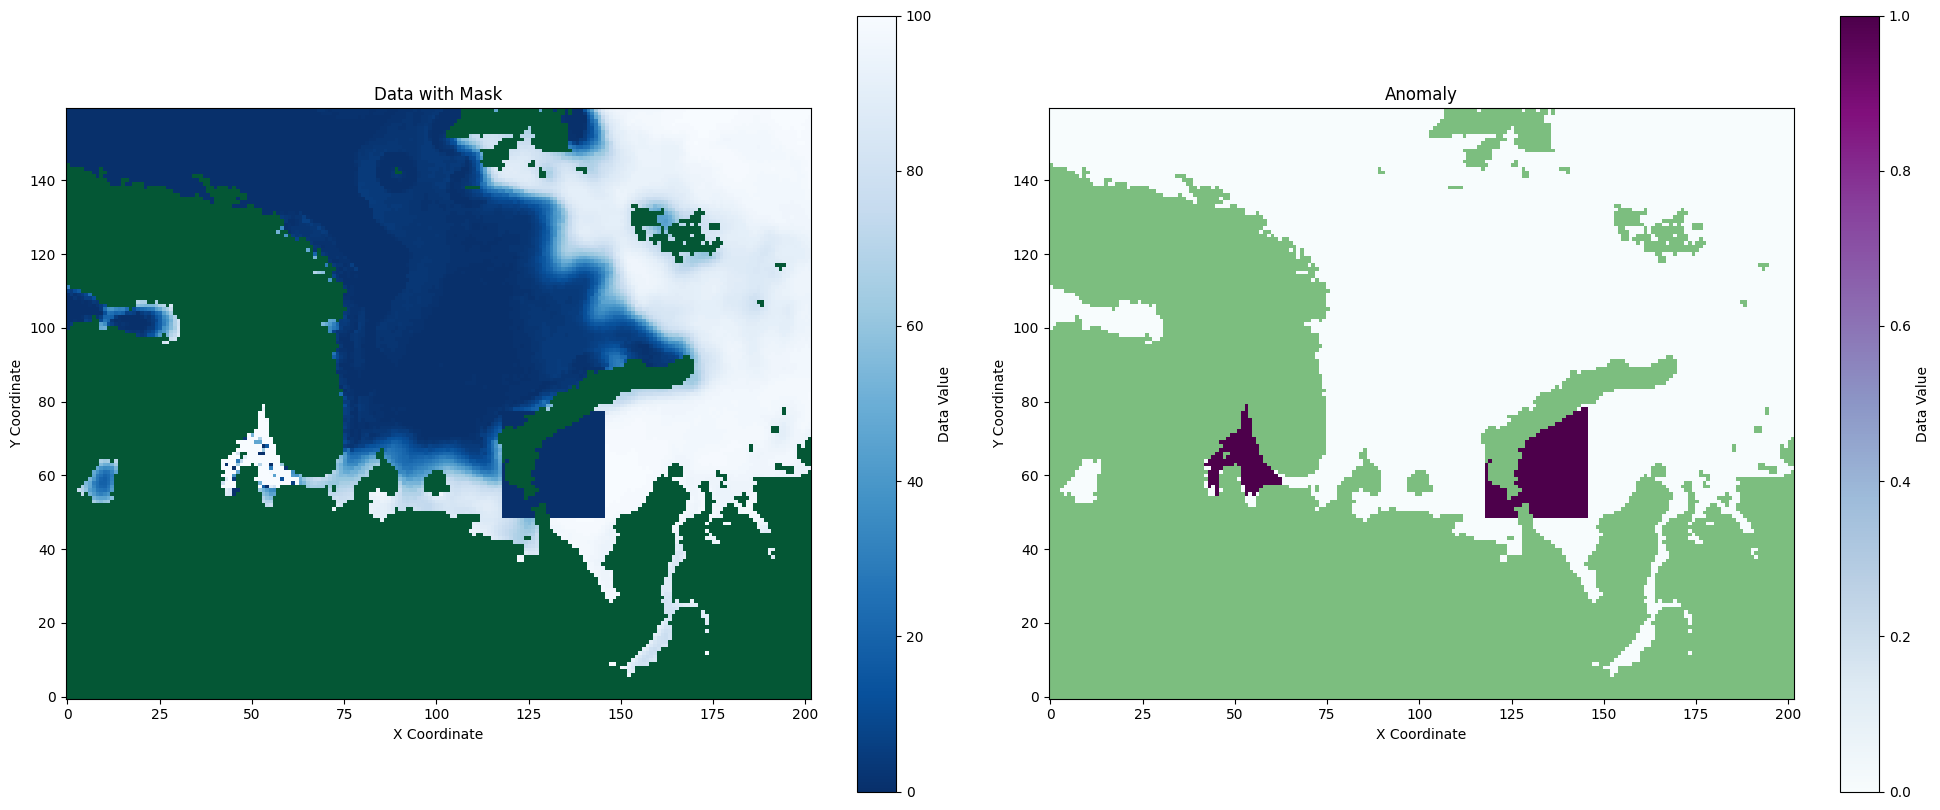

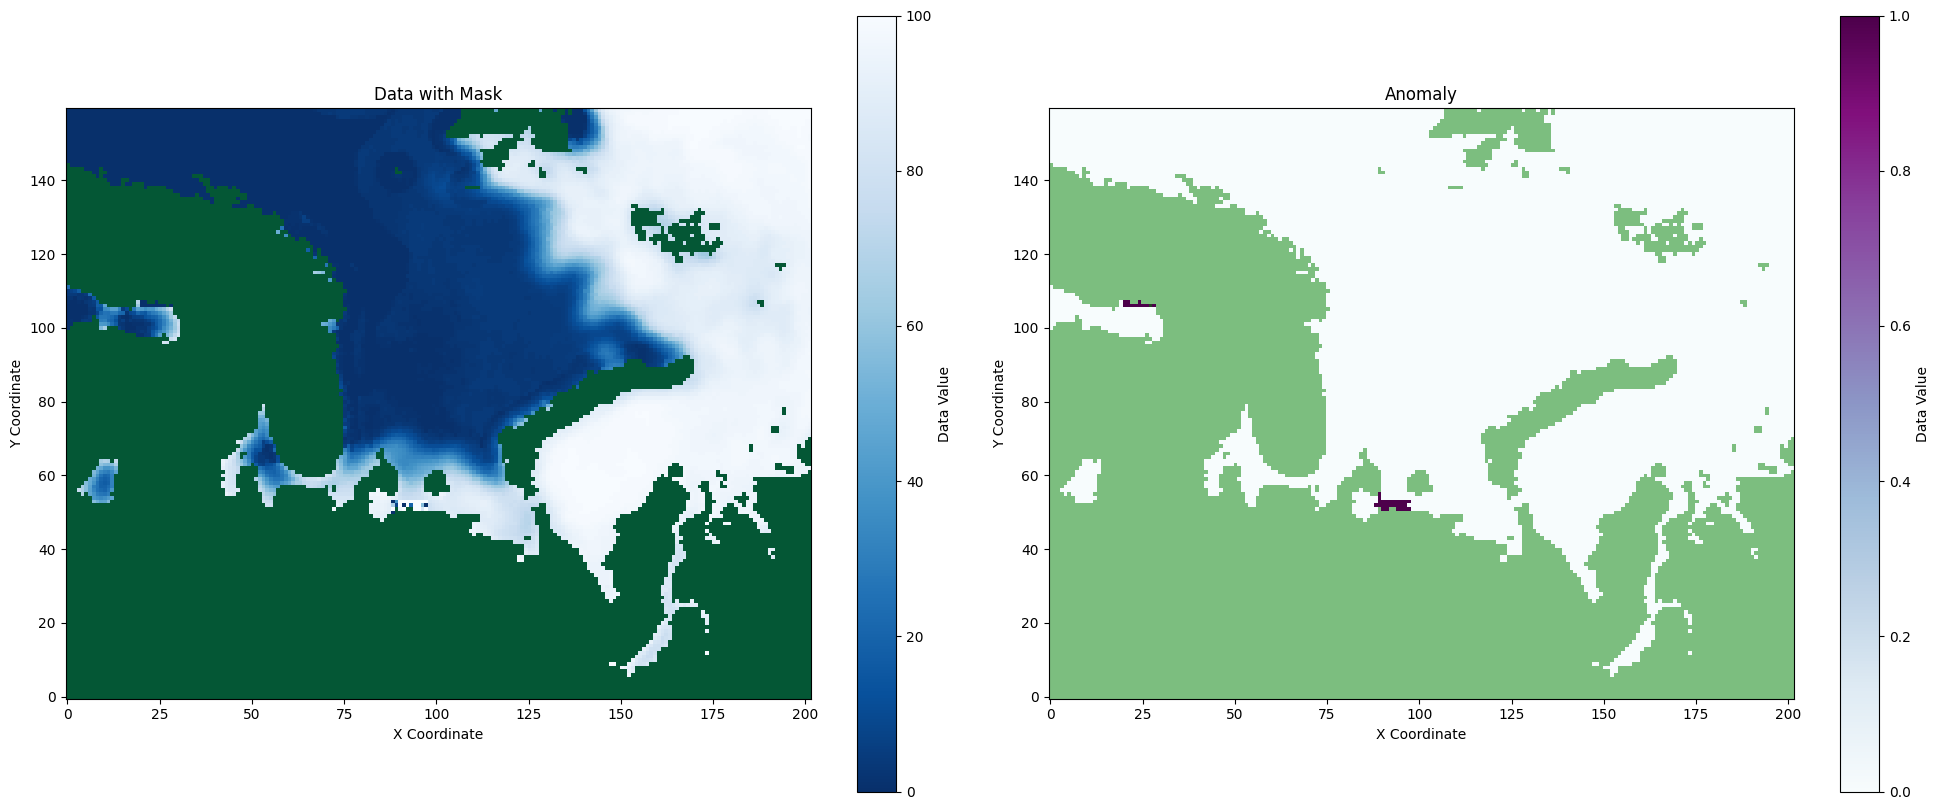

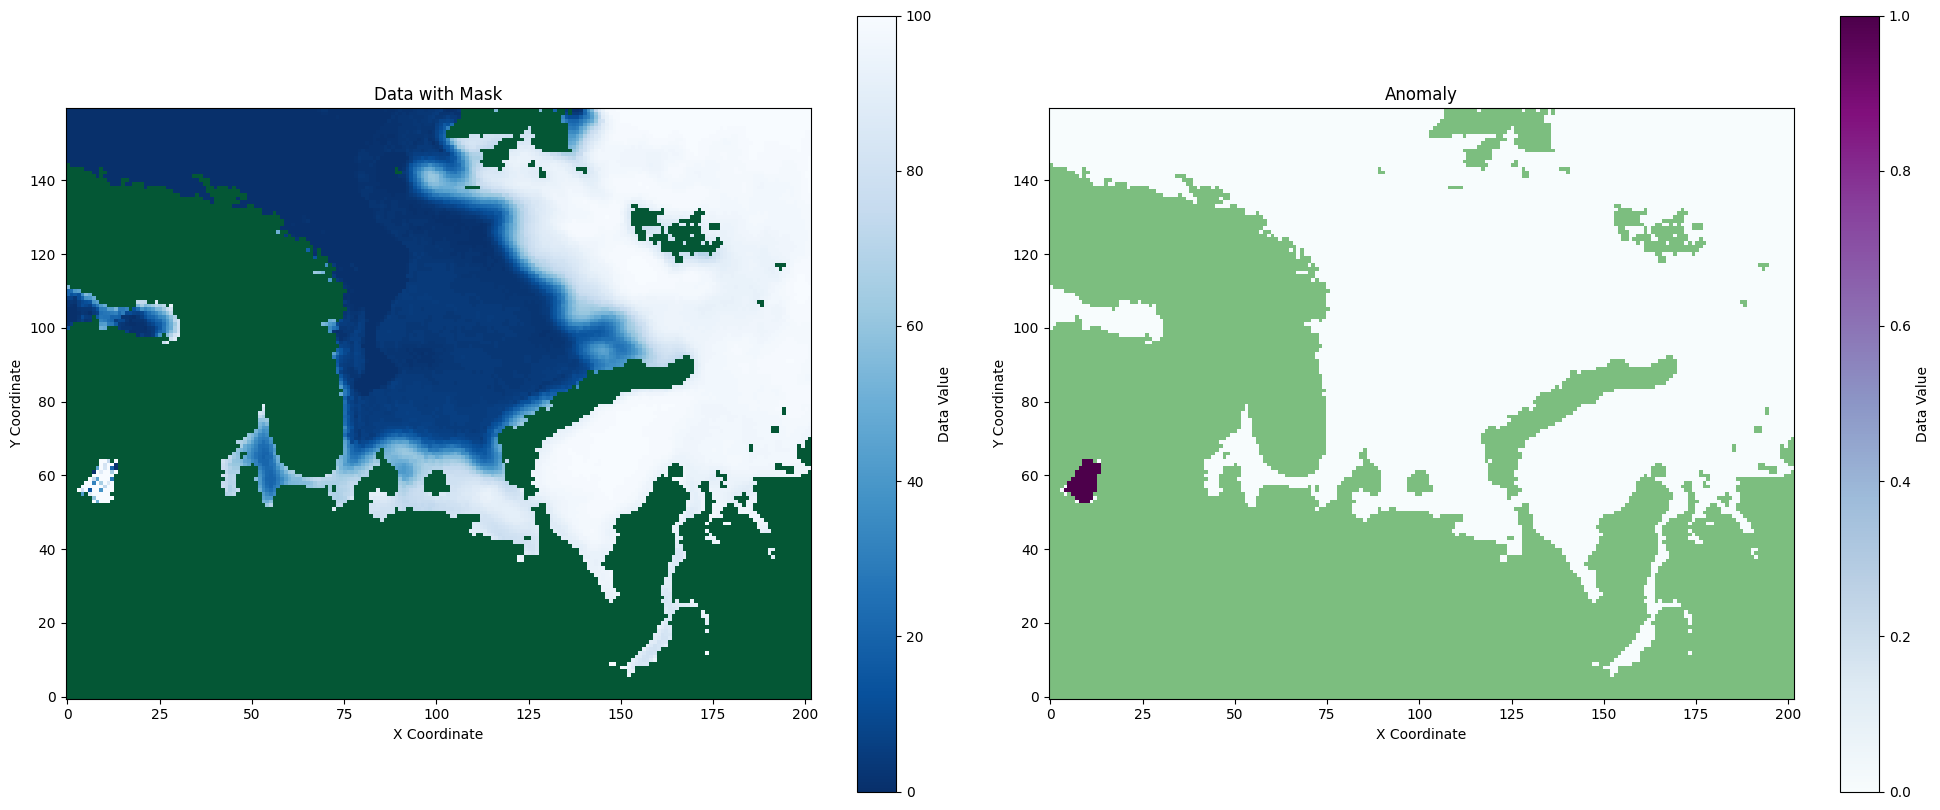

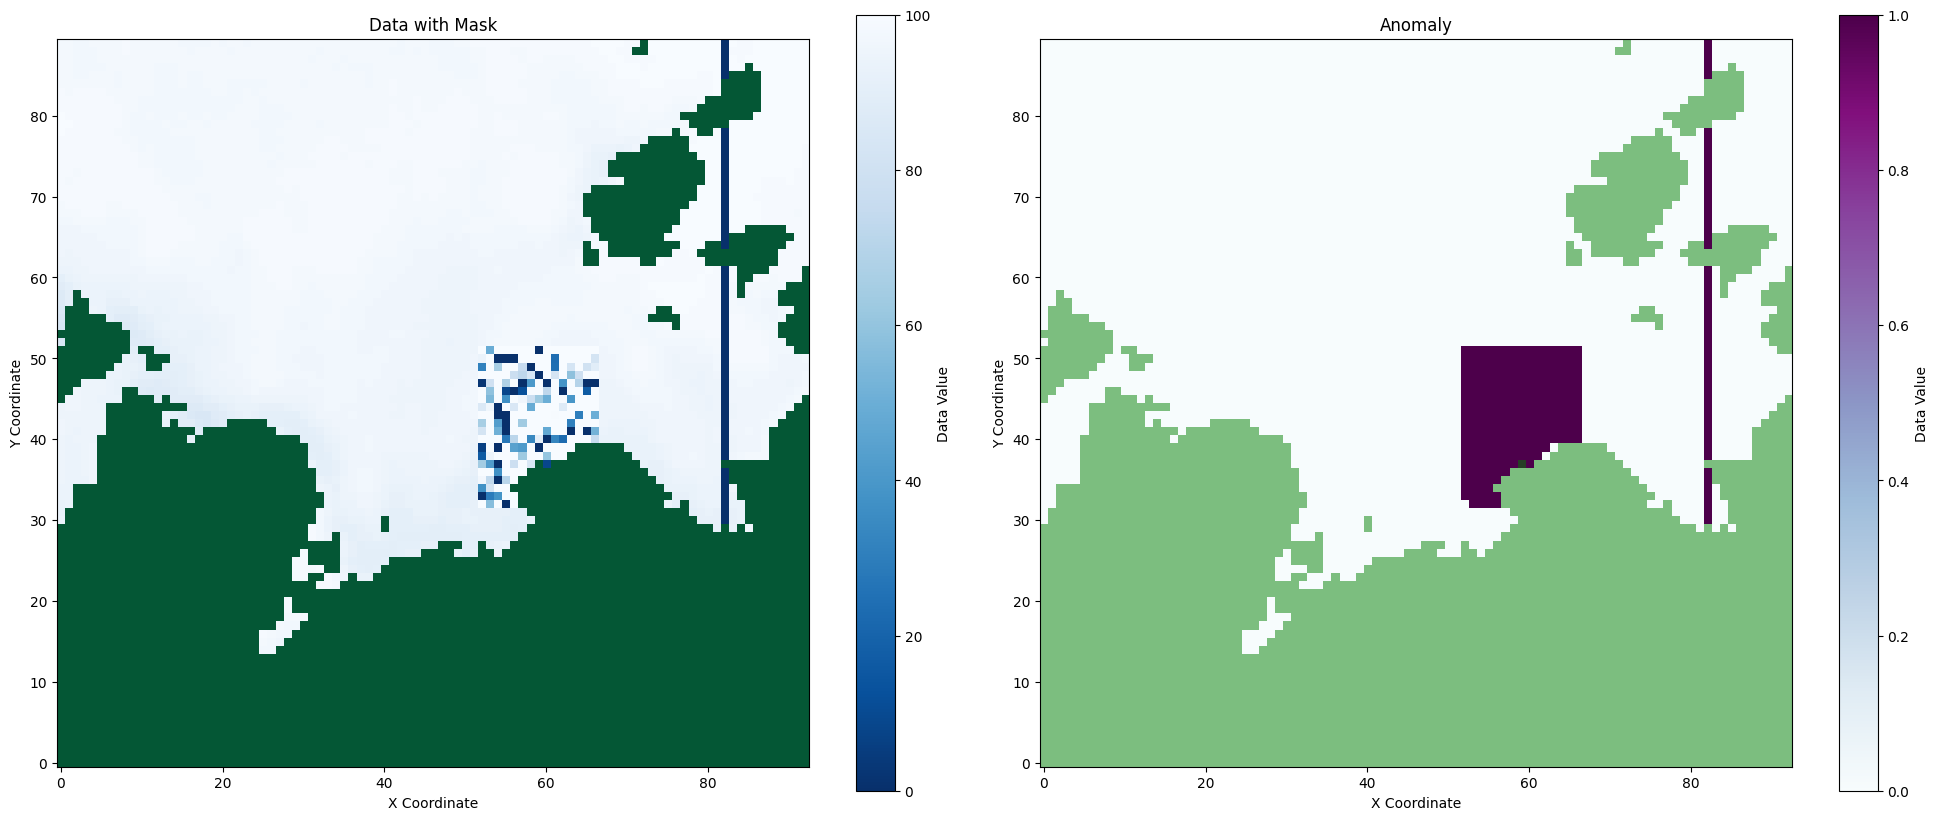

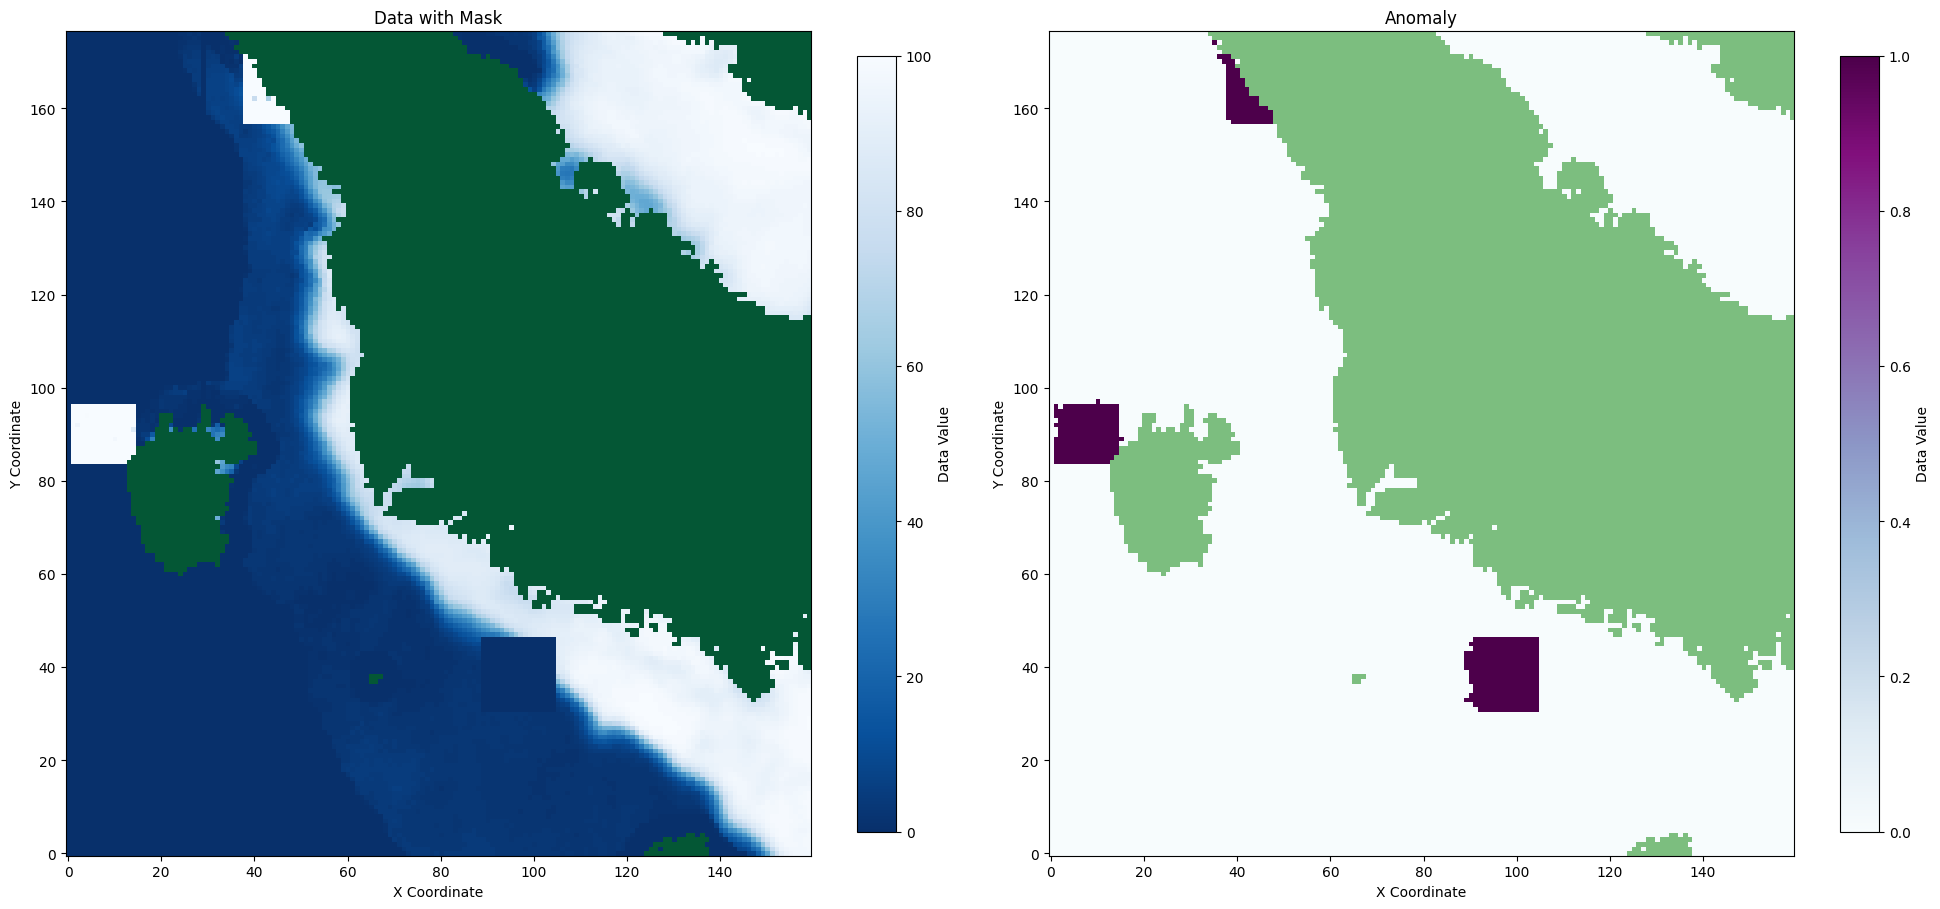

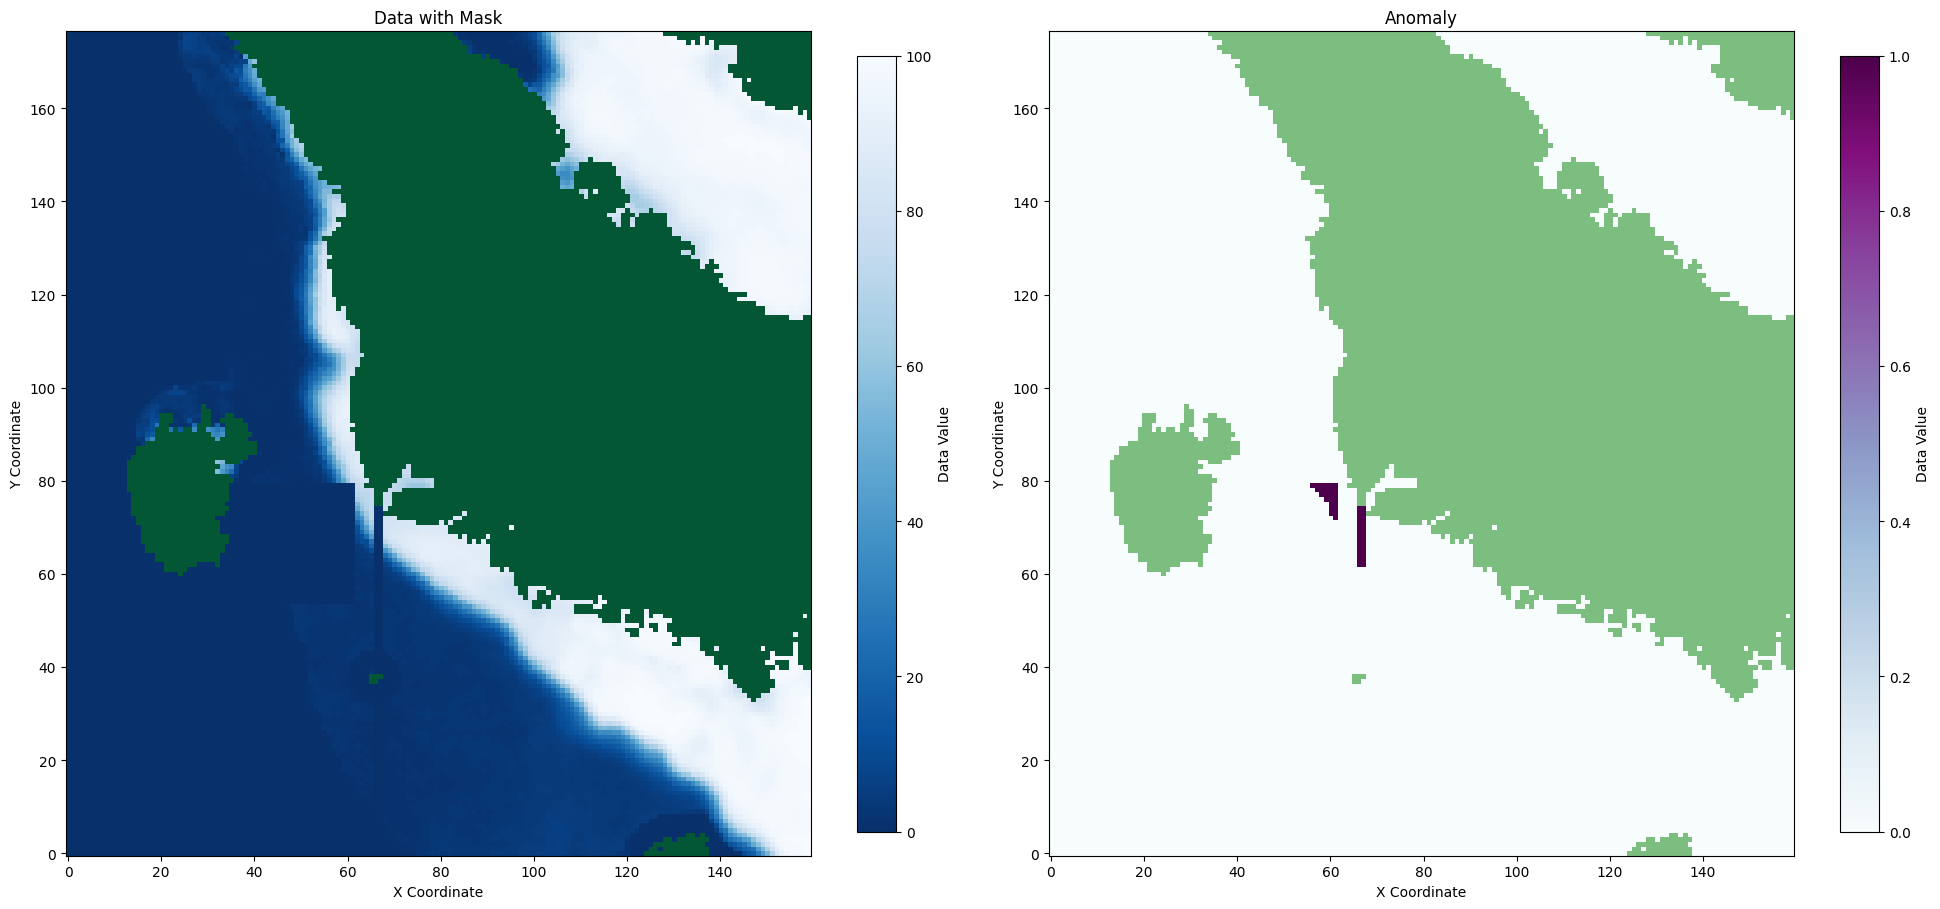

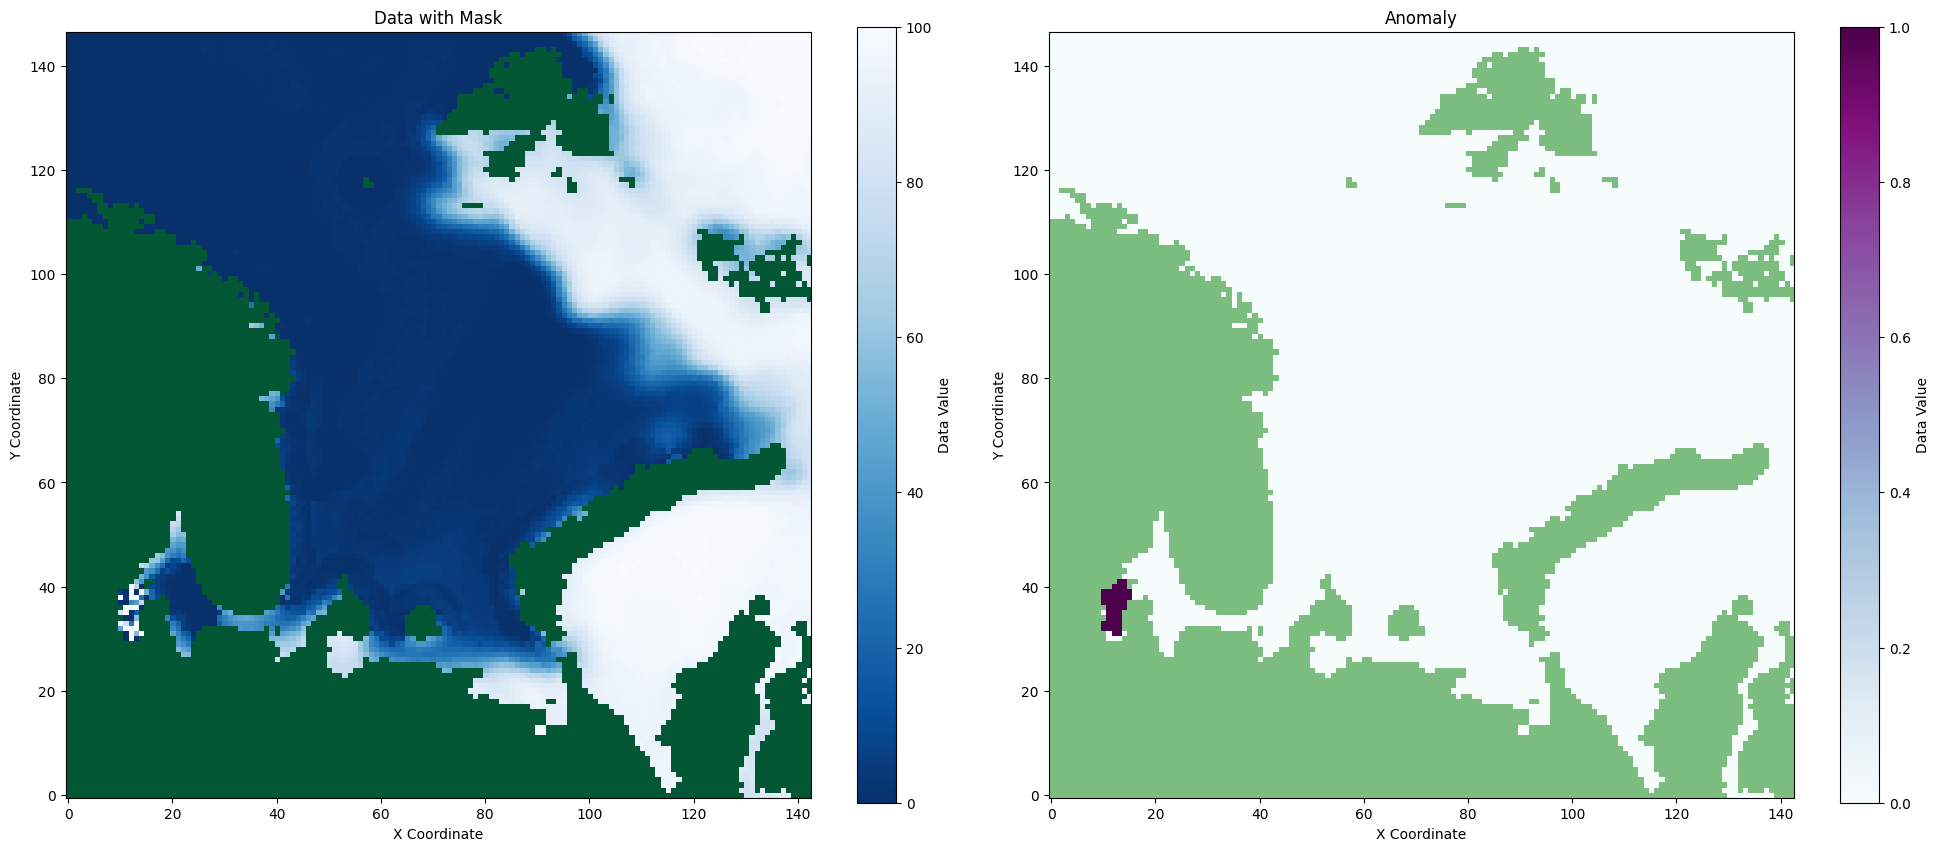

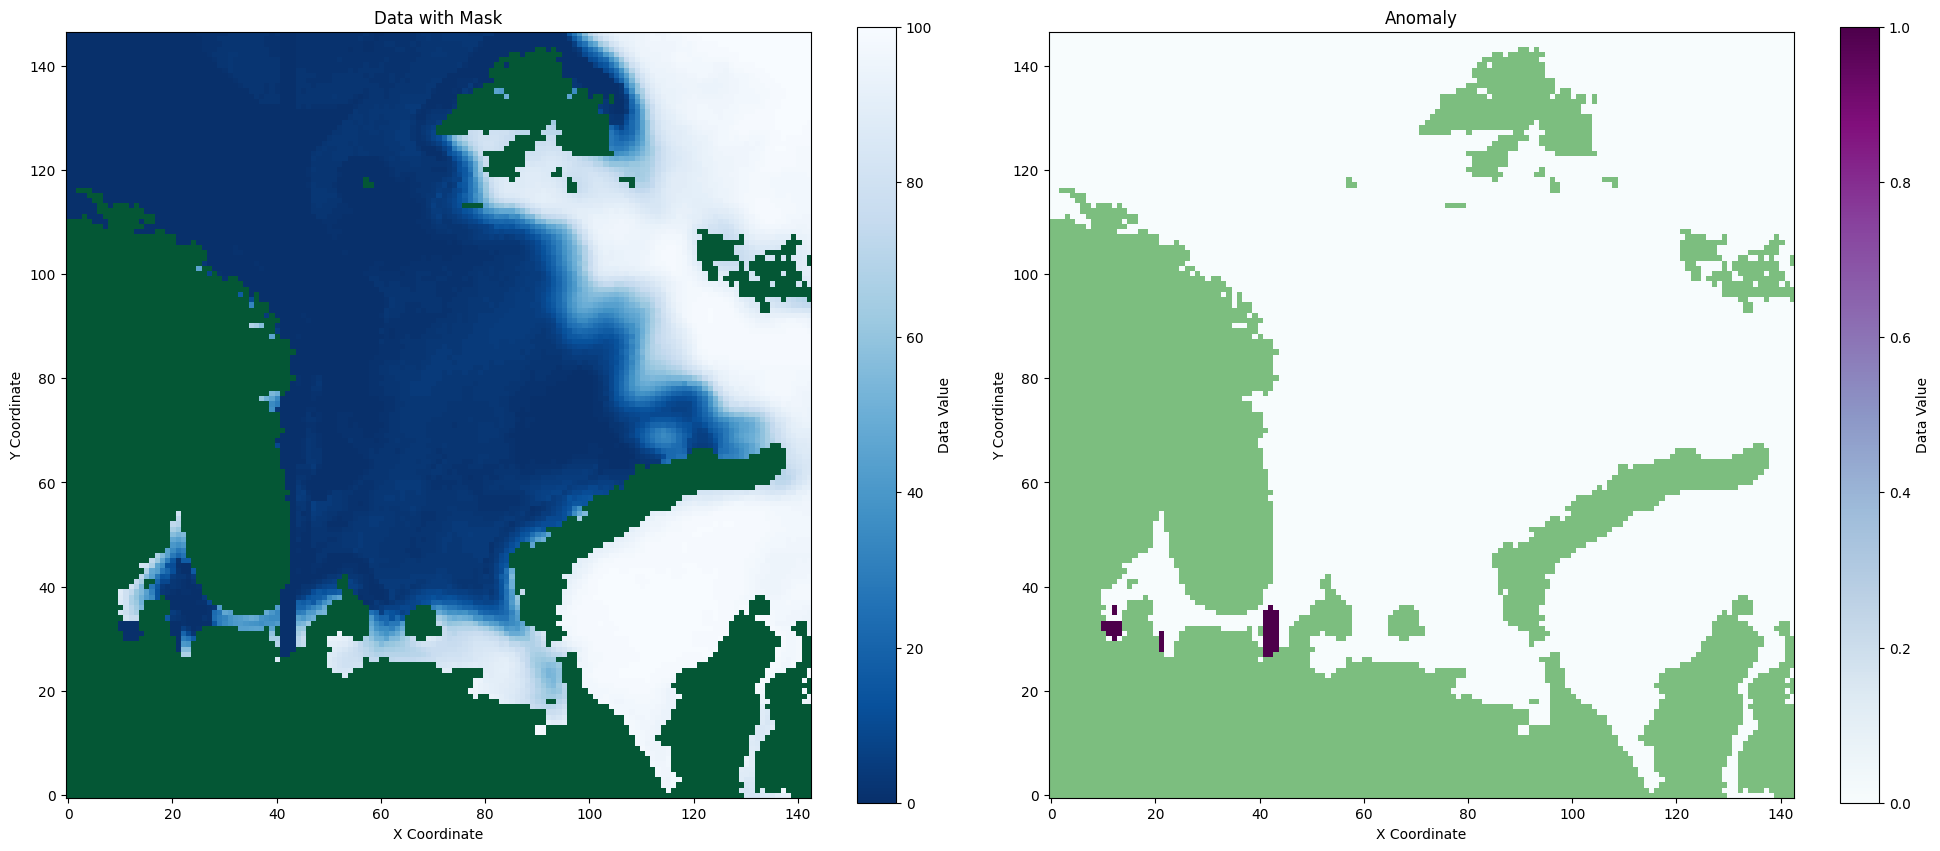

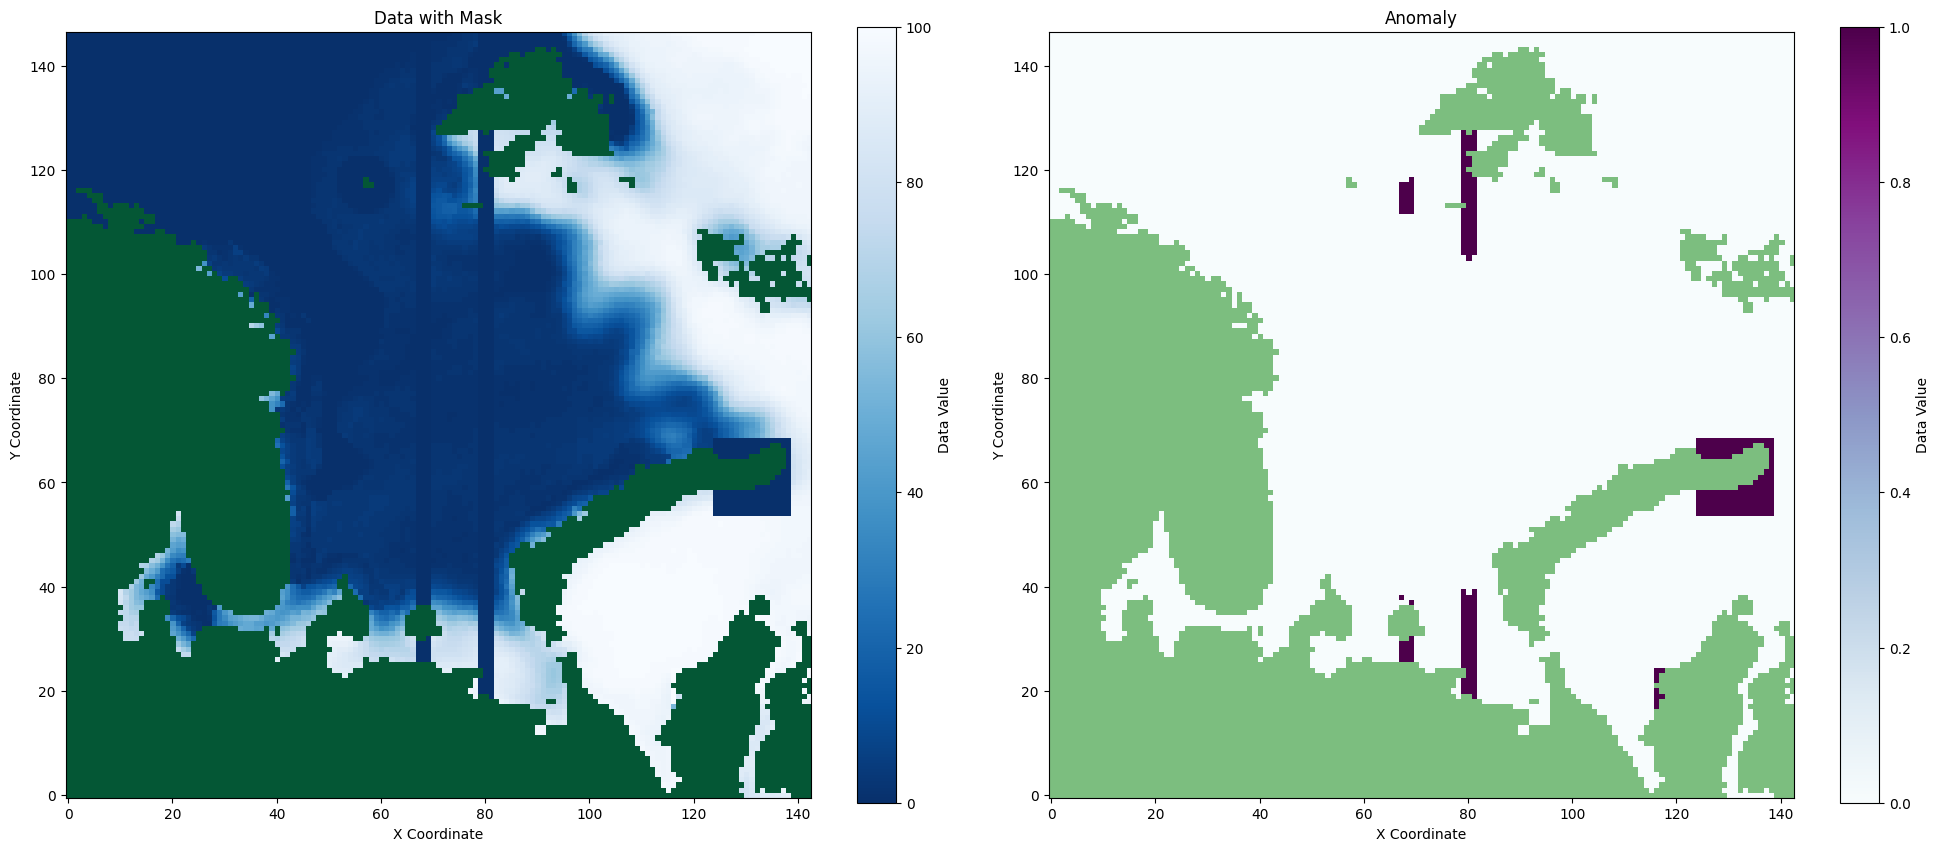

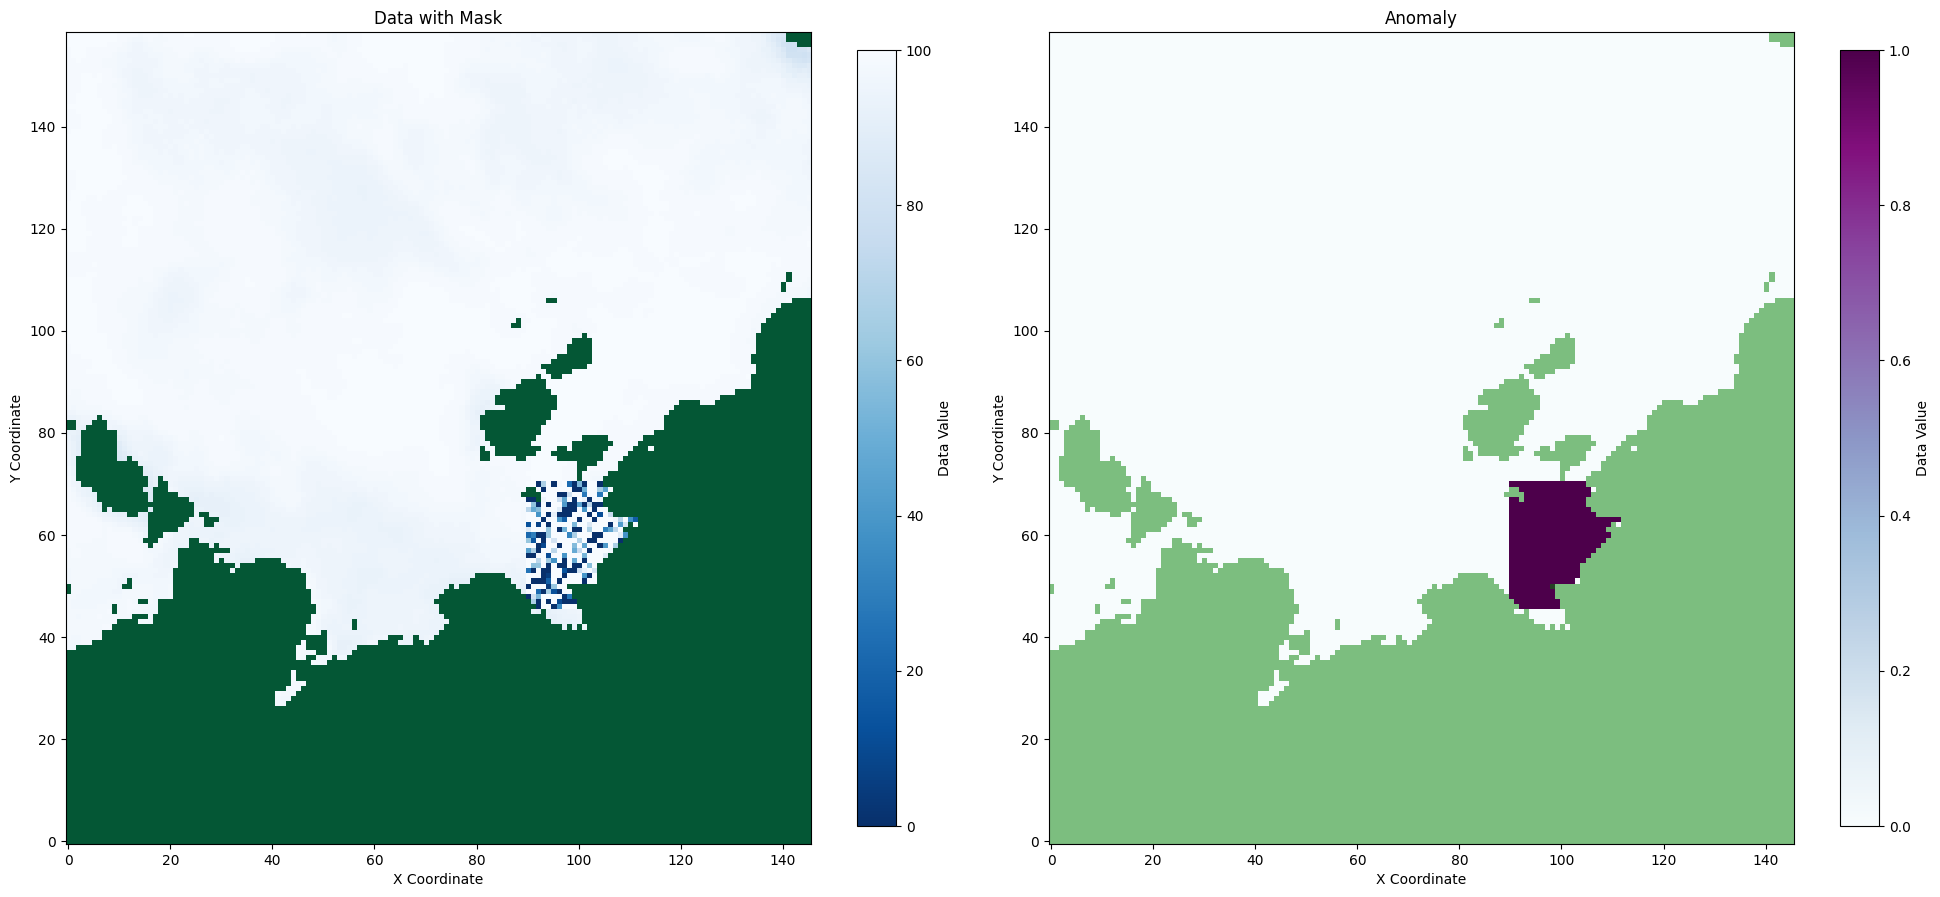

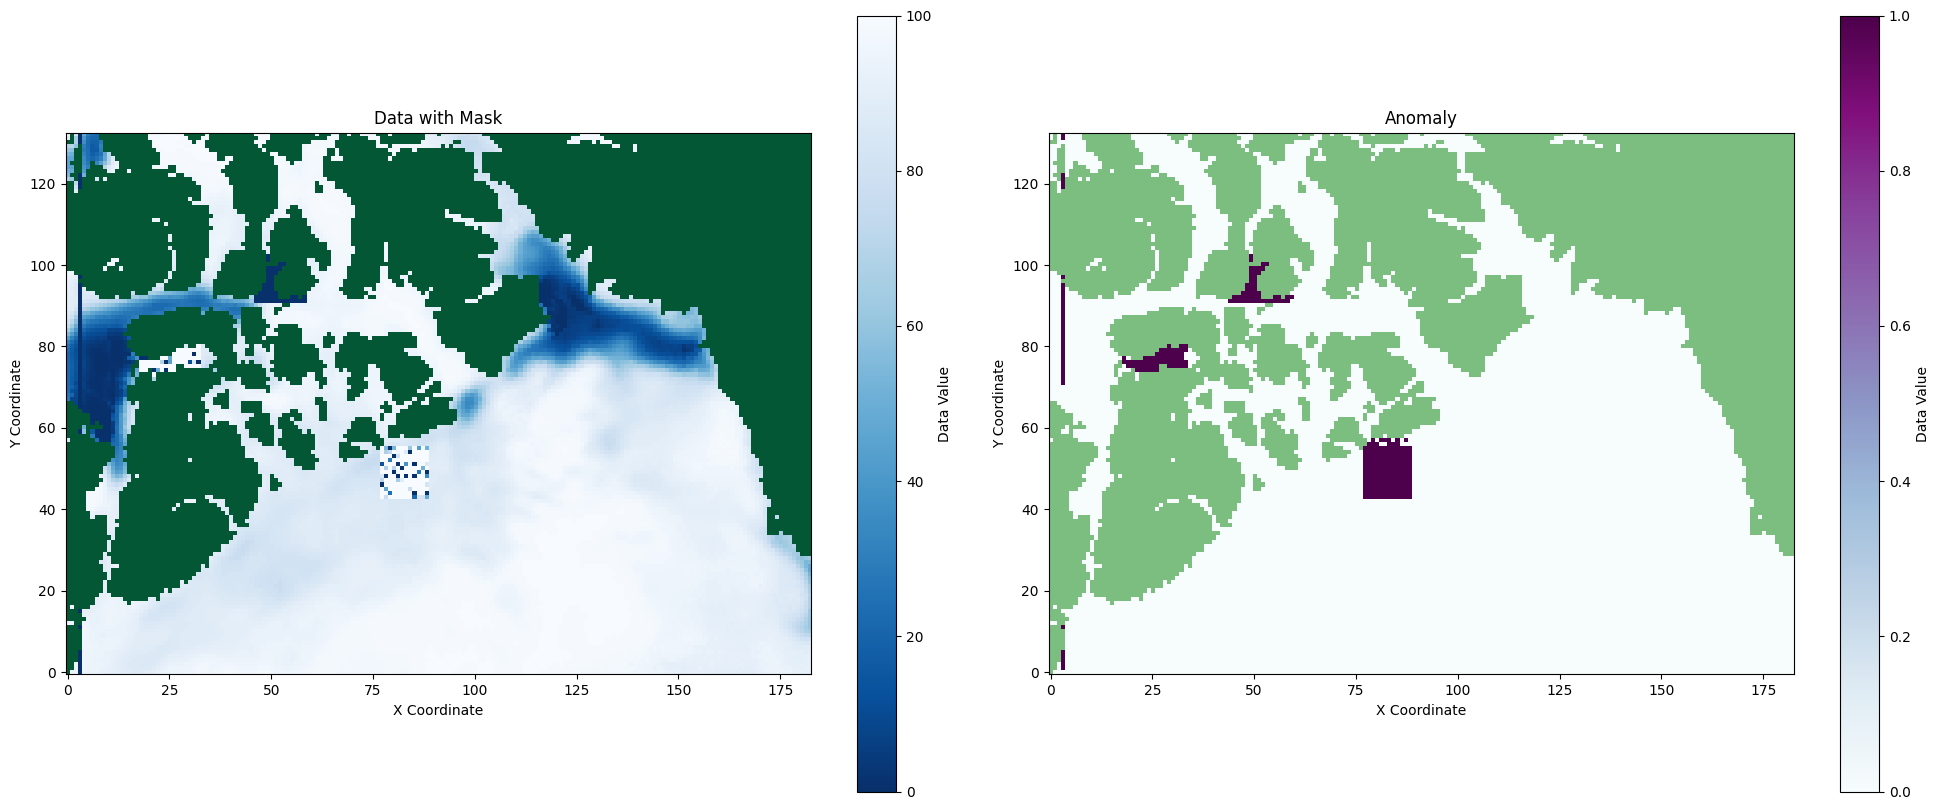

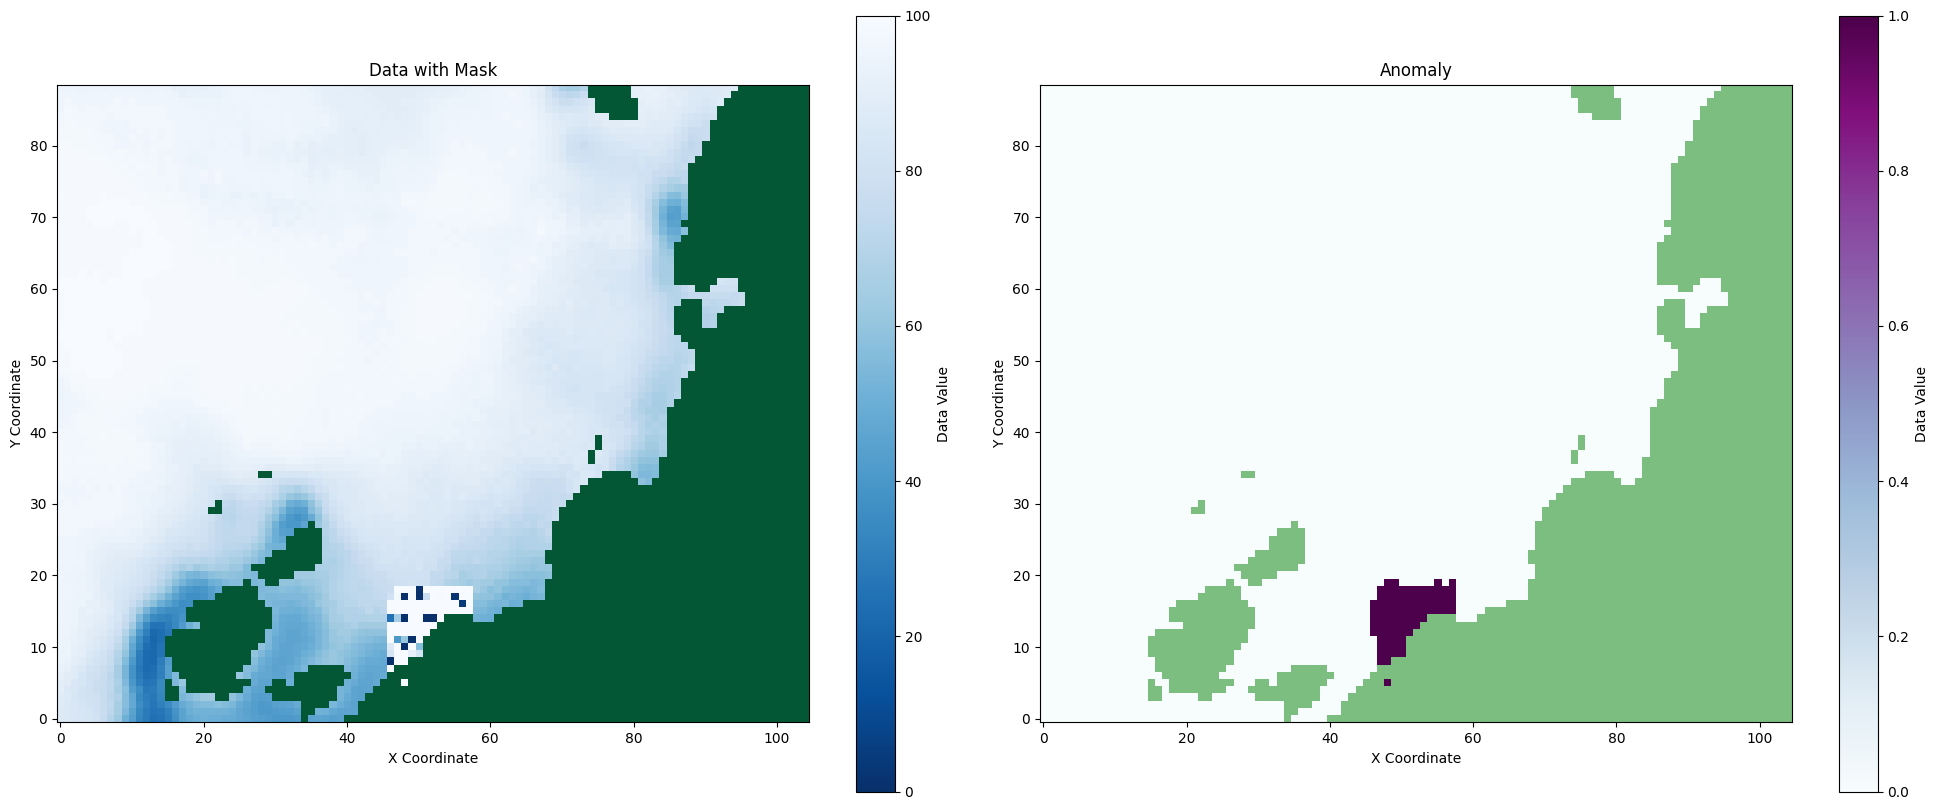

In [5]:
detector = AnomalyDetector()
for sea in seas:
    
    small_lat = np.load(f'lat_{sea}_small_p.npy')
    small_lon = np.load(f'lon_{sea}_small_p.npy')

    data = np.load(f'anom_data_{sea}_2015.npy')

    sea_idexes=sea_index_dict[sea]
    for index in sea_idexes:
        
        matrix_data=data[index]
        mask, small_land_water_mask = detector.get_anom_mask(matrix_data, small_lat, small_lon)
    
        
        fig, axarr = plt.subplots(1, 2, figsize=(20, 10))
        
        
        plot_with_mask(axarr[0], matrix_data, small_land_water_mask, 'Data with Mask', data_cmap='Blues_r', mask_color='green', vmin=0, vmax=100)
        
        
        plot_with_mask(axarr[1], mask, small_land_water_mask, 'Anomaly', data_cmap='BuPu', mask_color='green', vmin=0, vmax=1)
    
        
        plt.tight_layout()
        plt.show()